Начнем анализ популярных песен с рейтинга "500 величайших песен всех времён" по версии журнала Rolling Stone по состоянию на 2011 год. Посмотрим на данные, которые нам удалось заскрапить с Википедии.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('song2011).csv')

df.head(4)

,name,artist,year,producer,genre,language,length,label
0,Like a Rolling Stone,Боб Дилан,1965,Том Уилсон,фолк-рок,английский,06:13,Columbia Records
1,Johnny B. Goode,Чак Берри,1958,"Леонард Чесс,Фил Чесс",рок-н-ролл,американский английский,2:40,Chess
2,Good Vibrations,The Beach Boys,1966,Брайан Уилсон,"психоделический рок,арт-поп,эйсид-рок,психодел...",английский,3:39,Capitol
3,A Change Is Gonna Come,Сэм Кук,1964,NaN,соул,английский,3:12,RCA Victor


Отлично!

Теперь посмотрим, кто из исполнителей, которые попали в рейтинг журнала Rolling Stone, делали это чаще своих соседей по чарту. Составим топ 20 наиболее успешных артистов.

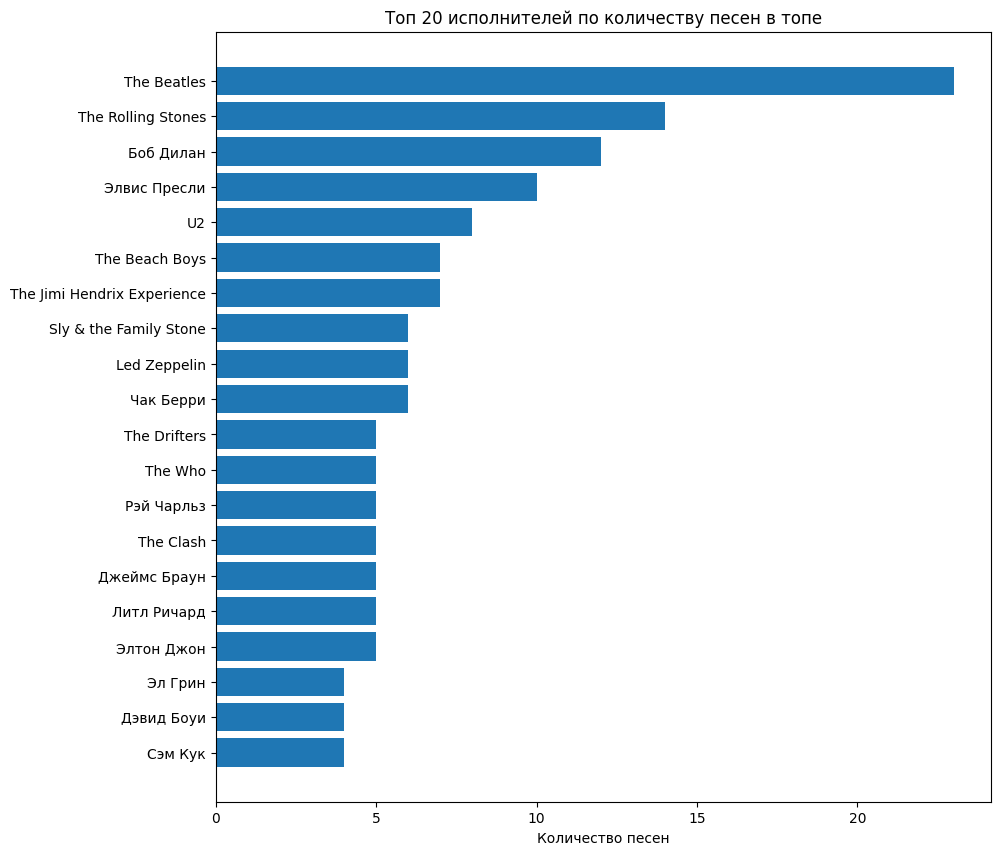

In [9]:
import matplotlib.pyplot as plt

grouped = df.groupby('artist').size()

# Создание нового датафрейма для более легкого построения графика
plot_data = pd.DataFrame({'artist': grouped.index, 'count': grouped.values})

# Сортируем данные по убыванию
plot_data = plot_data.sort_values('count', ascending=False)

# Отбор топ-20 исполнителей
plot_data = plot_data.head(20)

# Получение датафрейма, который связывает исполнителя с песней
songs_by_artist = df.groupby('artist')['name'].agg(lambda x: x.iloc[0])

# Добавление информации о песнях в данные для построения графика
top_artists_data = plot_data.set_index('artist').join(songs_by_artist)

plt.figure(figsize=(10,10))
barplot = plt.barh(top_artists_data.index, top_artists_data['count'])
plt.xlabel('Количество песен')
plt.title('Топ 20 исполнителей по количеству песен в топе')
plt.gca().invert_yaxis()

plt.show()

Похоже, что кто-то в редакции журнала не смог выбрать, какая песня The Beatles их любимая, - поместили в рейтинг больше двадцати песен группы.

Теперь посмотрим на рейтинг журнала и обратим внимание не только на артистов, но и на их лейблы. Чем больше артисты и лейблы взаимодействуют между собой, тем более востребованными они считаются в индустрии.

In [10]:
import networkx as nx

# Загрузка данных из файла
df = pd.read_csv('song2011).csv')

# Создание графа
G = nx.Graph()

# Добавление вершин для артистов
for artist in df['artist'].unique():
    G.add_node(artist, type='artist')

# Добавление вершин для лейблов
for label in df['label'].unique():
    G.add_node(label, type='label')

In [11]:
for index, row in df.iterrows():
    artist = row['artist']
    label = row['label']
    if not pd.isnull(label):
        G.add_edge(artist, label)

In [12]:
# Подсчет количества ребер
edge_counts = dict(G.degree())

# Вывод количества ребер для каждой вершины
for node in G.nodes():
    print(f'{node}: {edge_counts[node]} edges')

Боб Дилан: 3 edges
Чак Берри: 2 edges
The Beach Boys: 1 edges
Сэм Кук: 3 edges
The Who: 3 edges
Рэй Чарльз: 4 edges
The Beatles: 5 edges
Арета Франклин: 1 edges
The Rolling Stones: 5 edges
The Ronettes: 2 edges
Led Zeppelin: 3 edges
Джон Леннон: 1 edges
Марвин Гэй: 2 edges
The Shirelles: 1 edges
The Temptations: 1 edges
Joy Division: 1 edges
Lynyrd Skynyrd: 1 edges
Эми Уайнхаус: 1 edges
Глен Кэмпбелл: 0 edges
Стиви Уандер: 2 edges
Принс: 2 edges
Джефф Бакли: 1 edges
The Crystals: 3 edges
Nirvana: 2 edges
U2: 2 edges
Дэвид Боуи: 2 edges
The Miracles: 1 edges
Род Стюарт: 2 edges
Daft Punk: 1 edges
The White Stripes: 1 edges
Рой Орбисон: 2 edges
Мадонна: 1 edges
The Staple Singers: 1 edges
Franz Ferdinand: 1 edges
Pink Floyd: 2 edges
Элис Купер: 2 edges
Джимми Клифф: 1 edges
Джони Митчелл: 2 edges
The Animals: 2 edges
The Doors: 1 edges
Майкл Джексон: 1 edges
Элвис Костелло: 0 edges
Лаверн Бейкер: 0 edges
Дион: 2 edges
Мадди Уотерс: 3 edges
The Righteous Brothers: 2 edges
The Clash: 2 edg

Получили количество взаимодействий артистов и лейблов. Видим, что есть как исполнители одиночки, например такие как Глен Кэмпбелл и The Miracles, которые выпустили свои хиты не сотрудничая с лейблами. Есть и такие исполнители как, например, The Beatles и The Rolling Stones, которые написали свои хиты с пятью разными лейблами.

Самым востребованным же лейблом оказался Columbia, в разное время с ним выпускали свои хиты, попавшие в рейтинг журнала Rolling Stone сразу 15 исполнителей.

Нарисуем граф взаимодействий артистов и лейблов.

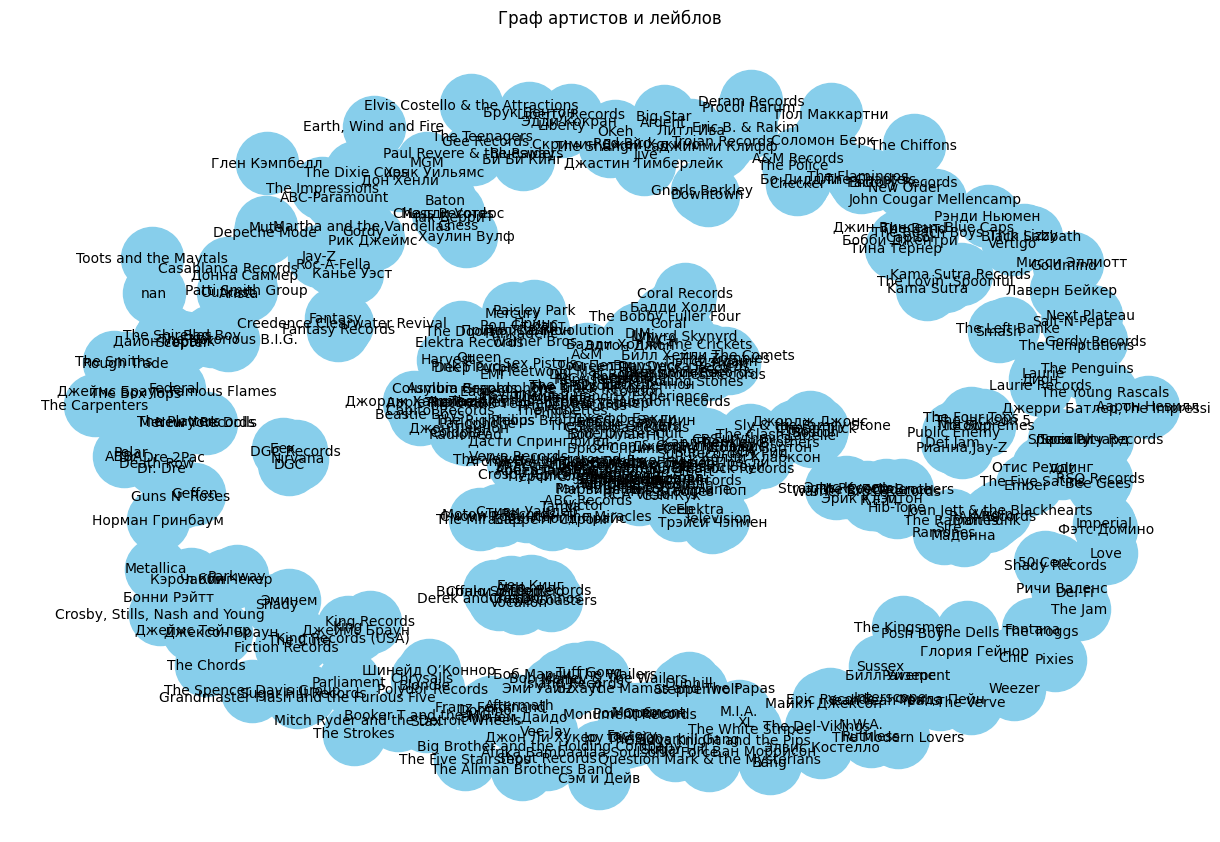

In [13]:
# Рисуем граф
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Какие позиции у вершин
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black')
plt.title('Граф артистов и лейблов')
plt.show()

Музыкальная индустрия далеко не маленькая. Но вернемся к нашей двадцатке самых-самых успешных исполнителей.

In [15]:
# Отберем топ 20 исполнителей
top_artists = plot_data['artist'].head(20)

# Создадим новый датафрейм
top_artists_df = pd.DataFrame({'artist': top_artists})

# Объединим его с информацией о песне для каждого исполнителя
top_artists_data = top_artists_df.join(songs_by_artist, on='artist')

# Выведем полученный DataFrame
print(top_artists_data)

                          artist                                      name
89                   The Beatles                                 Yesterday
129           The Rolling Stones             (I Can’t Get No) Satisfaction
171                    Боб Дилан                      Like a Rolling Stone
261                 Элвис Пресли                            Love Me Tender
152                           U2                      Sunday Bloody Sunday
88                The Beach Boys                           Good Vibrations
115  The Jimi Hendrix Experience                       The Wind Cries Mary
81        Sly & the Family Stone   Thank You (Falettinme Be Mice Elf Agin)
50                  Led Zeppelin                          Whole Lotta Love
256                    Чак Берри                           Johnny B. Goode
105                 The Drifters                       Under the Boardwalk
146                      The Who                             My Generation
238                   Рэй

Посмотрим откуда родом эти музыканты.

In [16]:
df = pd.read_csv('country_2011.csv')

df.head(4)

,name,artist,country
0,My Generation,The Who,Великобритания
1,London Calling,The Clash,Великобритания
2,Hound Dog,Элвис Пресли,США
3,Hey Jude,The Beatles,Великобритания


C:\Users\Lena\AppData\Roaming\Python\Python37\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


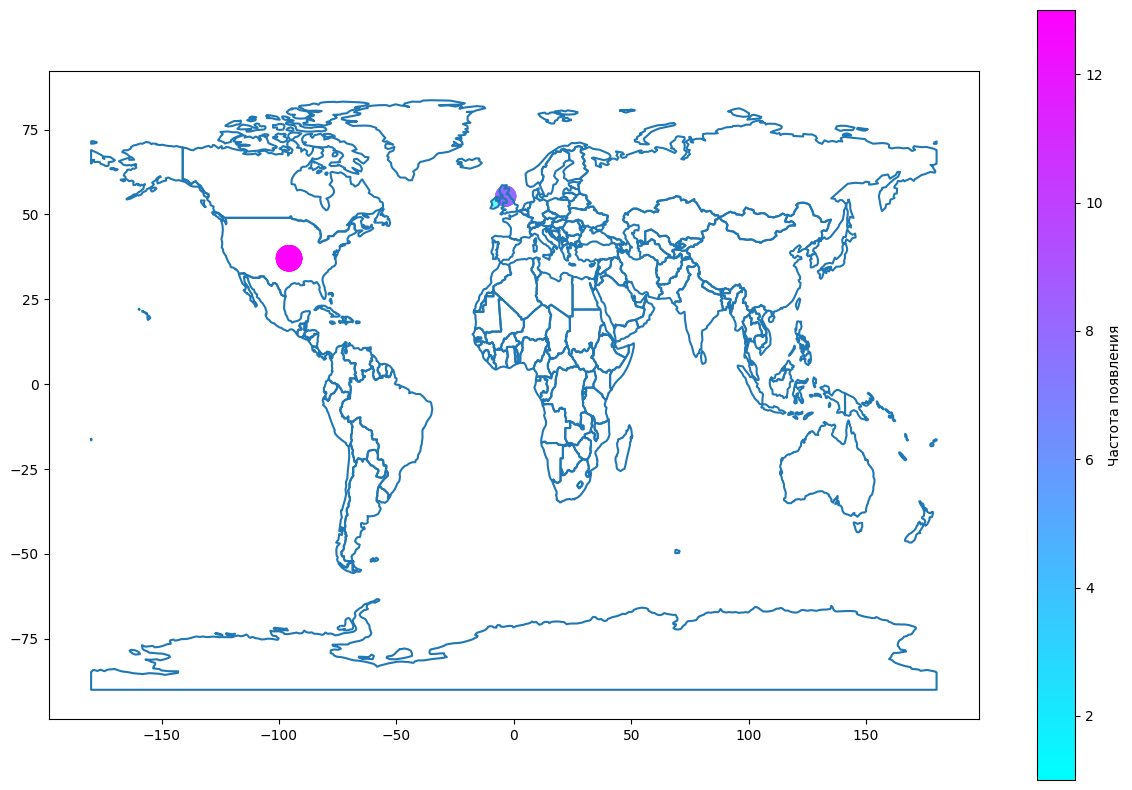

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Подсчет частоты появления стран в датафрейме
country_counts = df['country'].value_counts()

# Пользуемся тем, что датафрейм небольшой, и пропишем координаты только для появлявшихся в нем стран
coordinates = {
    'США': (37.0902, -95.7129),
    'Великобритания': (55.3781, -3.4360),
    'Ирландия': (53.1424, -7.6921),
}

# Добавляем географические координаты и частоту появления страны в датафрейме
df['Coordinates'] = df['country'].map(coordinates)
df['country_count'] = df['country'].map(country_counts)

# Создаем GeoDataFrame
geometry = gpd.points_from_xy(df['Coordinates'].apply(lambda x: x[1]), df['Coordinates'].apply(lambda x: x[0]))
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Загружаем мировую карту
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Строим карту мира с маркерами для каждой страны
ax = world.boundary.plot(figsize=(15, 10))

# Увеличиваем размер и делаем цвет маркера темнее для более частых стран
gdf.plot(ax=ax, column='country_count', cmap='cool', legend=True, legend_kwds={'label': "Частота появления"},
         markersize=df['country_count']*25, alpha=0.6)

plt.show()

Мы видим, что больше всего успешных-успешных исполнителей раболожилось в США, чуть меньше в Великобритании и сильно меньше в Ирландии. Здесь обошлось без сюрпризов.

Отдав дань уважения мэтрам, можно перенестись в наши лета и посмотреть, какие песни чаще всего слушали совсем недавно.
Воспользуемся готовым датасетом с Kaggle: https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year?resource=download

Это датасет из песен, которые с 2011 по 2019 год попадали в топ-10 Spotify.

In [18]:
import matplotlib as mpl
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')


In [19]:
data = pd.read_csv('top10s.csv', encoding='latin1')

data.head(4)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79


Отлично, мы получили наш новенький датасет. Теперь для каждой песни, попадавшей в чарт мы знаем ее исполнителя, жанр, год релиза, частоту битов в минуту, энергичность, танцевальность, громкость, степень обработки вокала и музыки, валентность, продолжительность, акустичность, количество речи в треке и его популярность.

Теперь попробуем на основе этого датасета построить графики и посмотреть на тренды, которые по топу песен можно отследить.

Сперва построим график корреляции известных для песни параметров.

In [20]:
# Будем строить график корреляции только количественных параметров
filtered_data = data.iloc[:, 4:14]

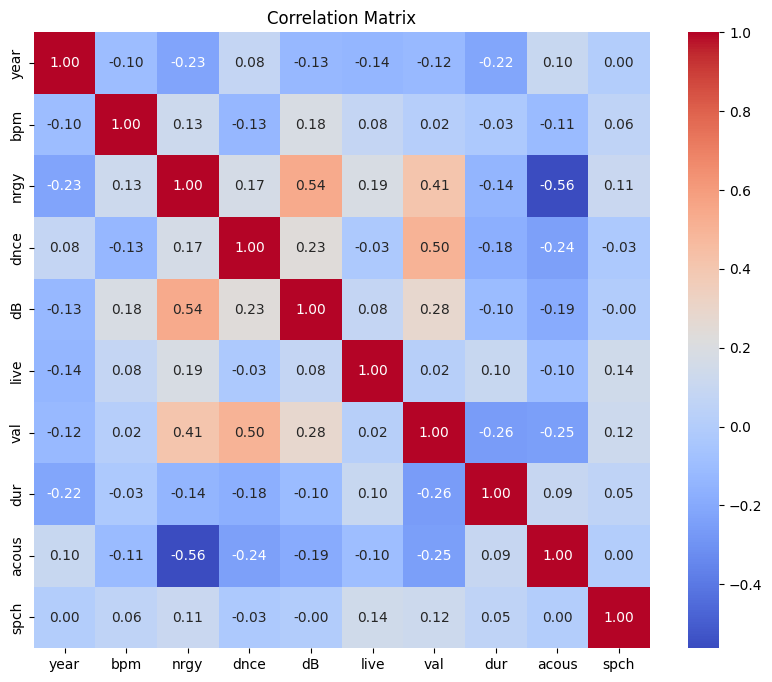

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитываем корреляционную матрицу
mtCor = filtered_data.corr()

# Создаем тепловую карту корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(mtCor, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

Мы видим сильную отрицательную корреляцию энергичности музыки и акустического звука; сильную положительную корреляцию энергичности и громкости, энергичности и валентности (песни высокой валентности воспринимаются как более позитивные, низкой - как более негативные), а также валентности и танцевальности.

Про менее выраженные результаты.
Есть как вполне ожидаемые результаты: корреляция -0.19 акустики и громкости, так и неожиданные: корреляция -0.13 частоты битов (beats per minute) c танцевальностью музыки.

Интересно, какую музыку пользователи Spotify предпочитают больше: веселую или грустную, энергичную или спокойную? Выясним это.

In [22]:
import numpy as np

# Вычисляем среднее значение для столбцов "nrgy" и "val"
mean_nrgy = np.mean(filtered_data['nrgy'])
mean_val = np.mean(filtered_data['val'])

# Вычисляем медиану для столбцов "nrgy" и "val"
median_nrgy = np.median(filtered_data['nrgy'])
median_val = np.median(filtered_data['val'])

# Вычисляем стандартное отклонение для столбцов "nrgy" и "val"
std_nrgy = np.std(filtered_data['nrgy'])
std_val = np.std(filtered_data['val'])

print("Среднее значение для столбца 'nrgy':", round(mean_nrgy))
print("Медиана для столбца 'nrgy':", round(median_nrgy))
print("Стандартное отклонение для столбца 'nrgy':", round(std_nrgy))
print()

print("Среднее значение для столбца 'val':", round(mean_val))
print("Медиана для столбца 'val':", round(median_val))
print("Стандартное отклонение для столбца 'val':", round(std_val))

Среднее значение для столбца 'nrgy': 71
Медиана для столбца 'nrgy': 74
Стандартное отклонение для столбца 'nrgy': 16

Среднее значение для столбца 'val': 52
Медиана для столбца 'val': 52
Стандартное отклонение для столбца 'val': 22


Мы видим, что слушатели Spotify предпочитают скорее энергичную музыку, а вот по грустности-веселости музыки явных предпочтений у пользователей нет.

Построим пузырьковыую диаграмму с и представим эти же (энергичность-спокойность и грустность-веселость) предпочтения слушателей графически. Размер пузырьков будет указывать на популярность песни.

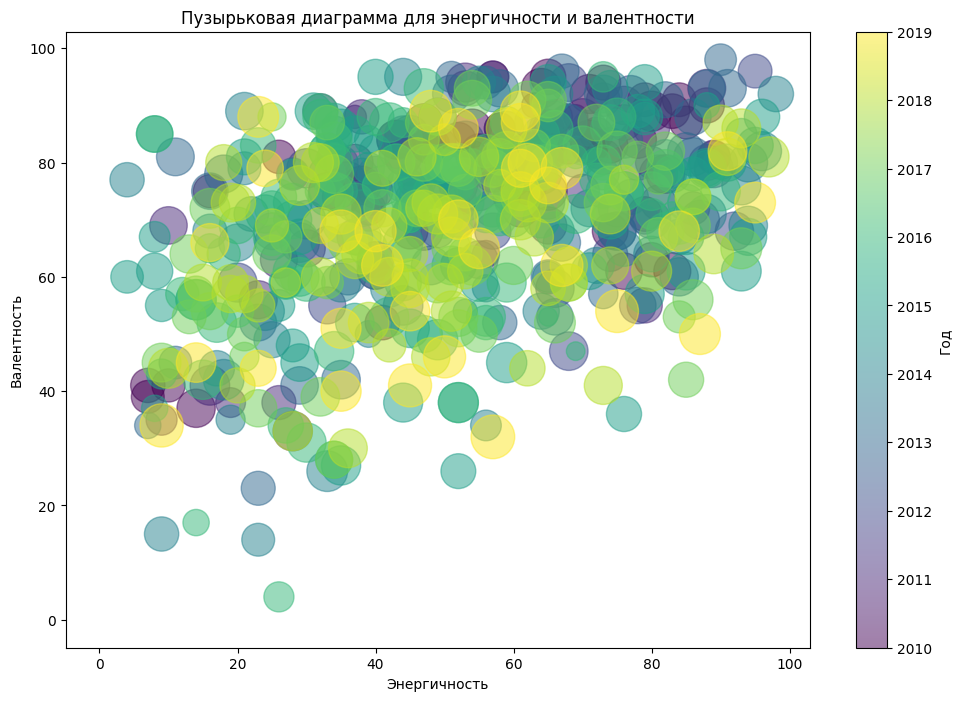

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(data['val'], data['nrgy'], s=data['pop']*10, alpha=0.5, c=data['year'], cmap='viridis')
plt.xlabel('Энергичность')
plt.ylabel('Валентность')
plt.title('Пузырьковая диаграмма для энергичности и валентности')
plt.colorbar(label='Год')
plt.show()

Пусть явных предпочтений по валентности музыыки у слушателей в целом нет. Но давайте возьмем исполнителя, чьи песни чаще всего подадали в топ Spotify и посмотрим на валентность всех его песен, которые попали в топ.

Возможно, на топ артиста это правило не распространяется и его слушатели имеют явно выраженные предпочтения?

C:\Users\Lena\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


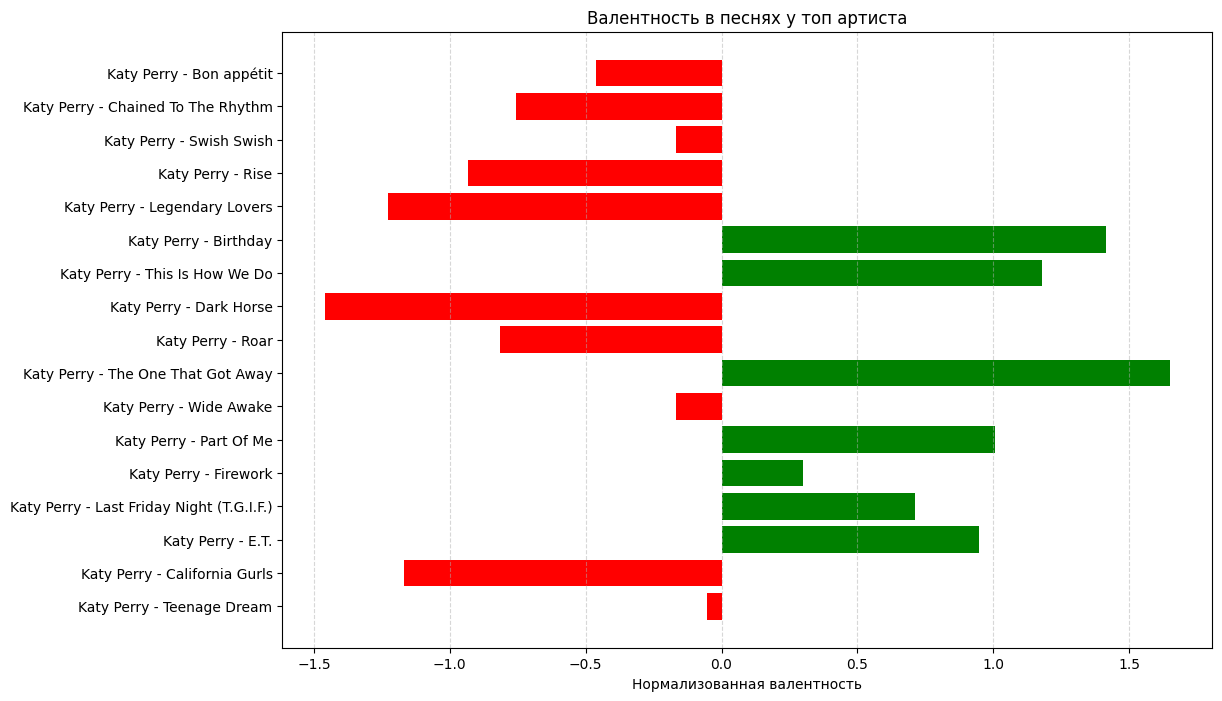

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчет количества песен для каждого артиста
artist_counts = data['artist'].value_counts()

# Выбор топ 20 артистов по количеству песен
top_artists = artist_counts.head(1).index

# Фильтрация данных только для топ 20 артистов
data_top_artists = data[data['artist'].isin(top_artists)]

# Нормализация данных по колонке 'bpm' для создания столбцов
x = data_top_artists['val']
data_top_artists['val_z'] = (x - x.mean()) / x.std()

# Создание графика расходящихся столбцов с текстом для топ 20 артистов
plt.figure(figsize=(12, 8))
bars = plt.barh(data_top_artists['artist'] + ' - ' + data_top_artists['title'], data_top_artists['val_z'], color=['red' if x < 0 else 'green' for x in data_top_artists['val_z']])
plt.xlabel('Нормализованная валентность')
plt.title('Валентность в песнях у топ артиста')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Как мы видим, правда для общего случая оказалась правдой и для частного - пользователи Spotify одинаково любят и повеселиться, и погрустить.

Теперь попробуем с помощью линейной регрессии научиться предсказывать популярность трека в зависимости от частоты битов. Разделим наши данные на обучающий набор и тестовый набор, которые будут занимать 80 и 20 процентов от общего датасета соответственно. 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = pd.read_csv('top10s.csv', encoding='latin1')

# Выбор нужных признаков и целевой переменной
X = data[["bpm"]]
y = data["pop"]

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)
# print(y_pred)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")


Среднеквадратичная ошибка: 242.41505650383144


Мы видим, что среднеквадратичная ошибка при попытке предсказать популярность трека по частоте битов высока, и, значит, делать предсказания, основываясь на этой модели, крайне нежелательно. Секрет успеха так и остался секретом.

Посмотрим, какие артисты могут сказать про себя: "я знаю, как сделать так, чтобы трек залетел в чарты". Возьмем пограничное значение в 15 треков: если столько песен исполнителя попало в чарт, то мы сможем посмотреть на популярность этого артиста сквозь года.

Выбираем артистов, за чьей карьерой мы хотим проследить, и строим график.

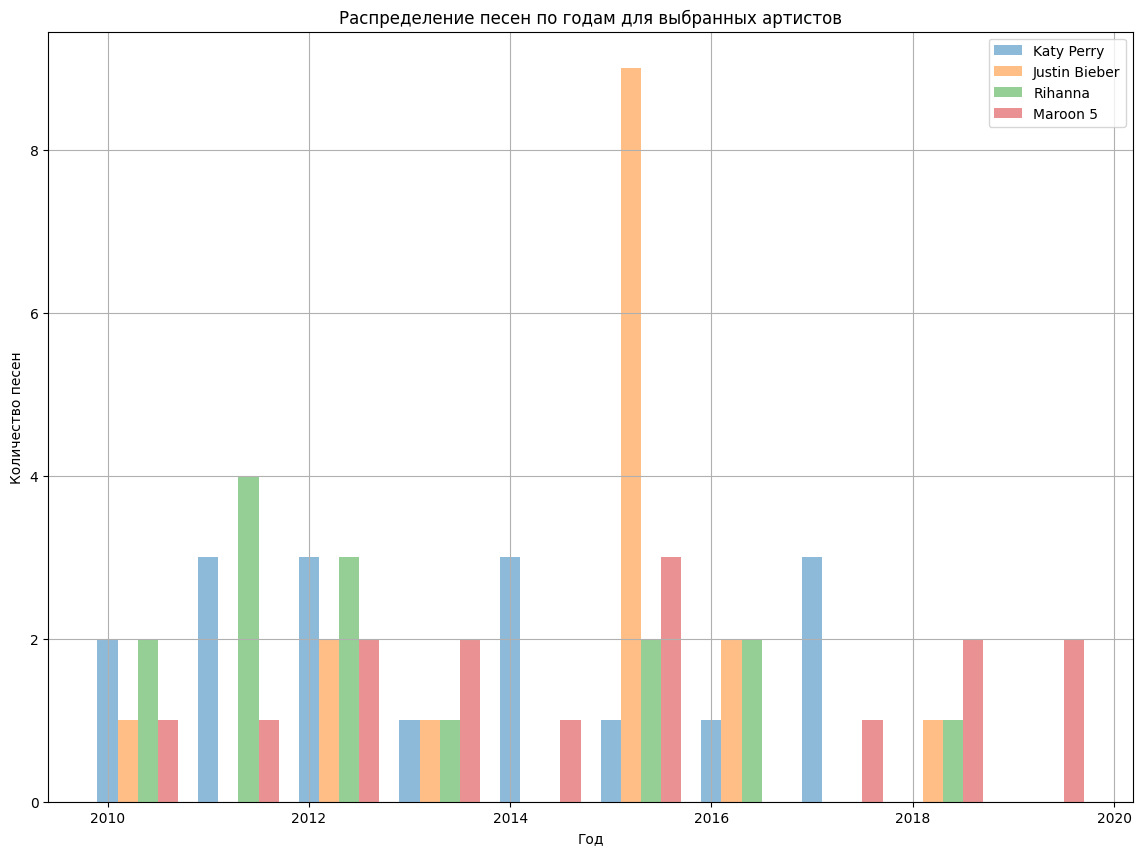

In [27]:
import numpy as np
from ipywidgets import widgets

# Группировка данных по годам и артистам
artist_years = data[data['year'] <= 2019].groupby(['year', 'artist']).size().unstack()

# Отбор артистов, которые встречаются в датасете не менее 15 раз
valid_artists = data['artist'].value_counts()[data['artist'].value_counts() >= 15].index
artist_years = data[data['year'] <= 2019].groupby(['year', 'artist']).size().unstack().loc[:, valid_artists]

# Создание чекбоксов для выбора артистов
artist_checkboxes = [widgets.Checkbox(description=artist, value=False) for artist in artist_years.columns]

# Создание кнопки подтверждения
confirm_button = widgets.Button(description='Построить график')
confirmation_output = widgets.Output()

# Заполнение пропусков нулями
artist_years_filled = artist_years.fillna(0)

def plot_selected_artists(button_click):
    selected_artists = [checkbox.description for checkbox in artist_checkboxes if checkbox.value]
    if selected_artists:
        fig, ax = plt.subplots(figsize=(14, 10))
        x = artist_years_filled.index
        bar_width = 0.8 / len(selected_artists)  # Чтобы столбцы не накладывались друг на друга

        for i, artist in enumerate(selected_artists):
            y_values = artist_years_filled[artist].values
            ax.bar(x + i * bar_width, y_values, width=bar_width, alpha=0.5, label=artist)

        ax.set_title('Распределение песен по годам для выбранных артистов')
        ax.set_xlabel('Год')
        ax.set_ylabel('Количество песен')
        ax.legend()
        ax.grid(True)
        plt.show()
    else:
        with confirmation_output:
            print('Выберите хотя бы одного артиста для построения графика.')

# Привязываем функцию к кнопке
confirm_button.on_click(plot_selected_artists)

# Отображаем чекбоксы
user_input = widgets.VBox(artist_checkboxes + [confirm_button, confirmation_output])
display(user_input)

Возможно, столбчатая диаграмма была не самым удачным решением для визуализации этих данных. Попробуем другое решение.

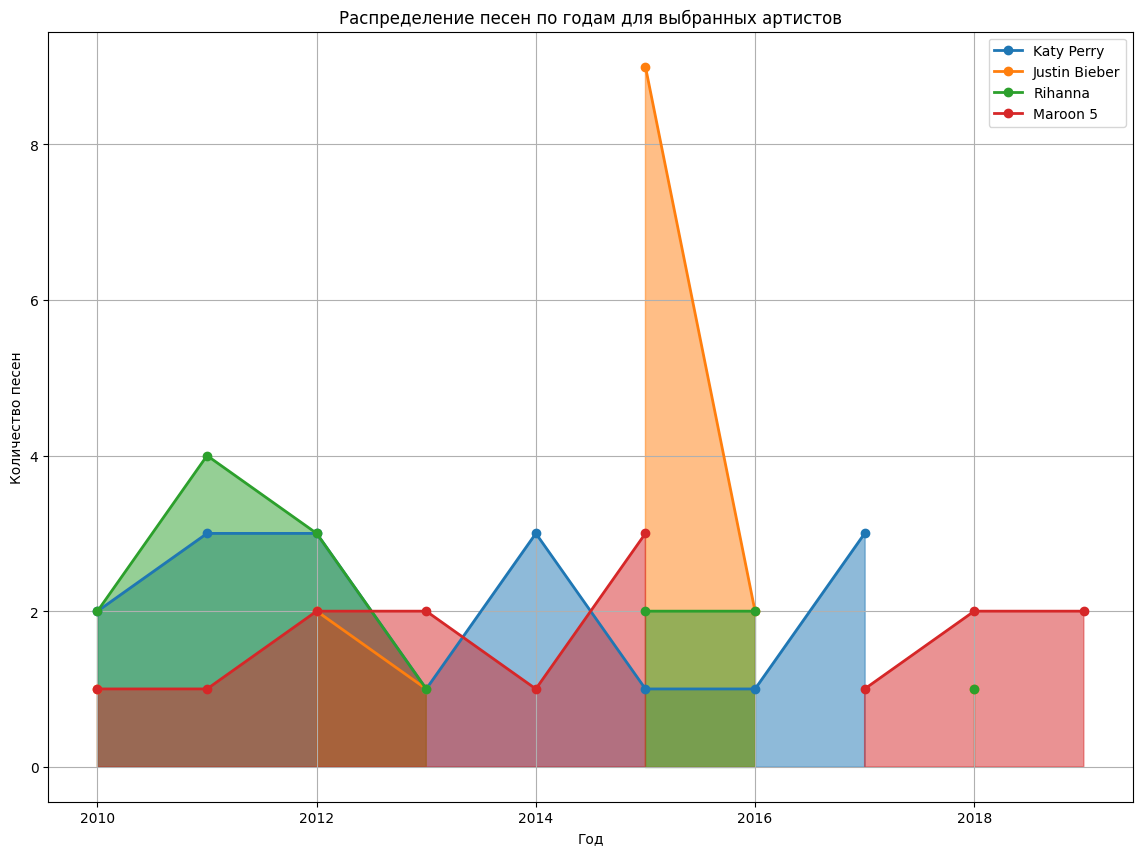

In [28]:
import matplotlib.pyplot as plt

# Группировка данных по годам и артистам
artist_years = data[data['year'] <= 2019].groupby(['year', 'artist']).size().unstack()

# Отбор артистов, которые встречаются в датасете не менее 15 раз
valid_artists = data['artist'].value_counts()[data['artist'].value_counts() >= 15].index
artist_years = data[data['year'] <= 2019].groupby(['year', 'artist']).size().unstack().loc[:, valid_artists]

# Создание чекбоксов для выбора артистов
artist_checkboxes = [widgets.Checkbox(description=artist, value=False) for artist in artist_years.columns]

# Создание кнопки подтверждения
confirm_button = widgets.Button(description='Построить график')
confirmation_output = widgets.Output()

# Заполнение пропусков нулями
artist_years_filled = artist_years.fillna(0)

def plot_selected_artists(button_click):
    selected_artists = [checkbox.description for checkbox in artist_checkboxes if checkbox.value]
    if selected_artists:
        fig, ax = plt.subplots(figsize=(14, 10))
        for artist in selected_artists:
            ax.plot(artist_years.index, artist_years[artist], marker='o', linewidth=2, linestyle='-', label=artist)
            ax.fill_between(artist_years.index, 0, artist_years[artist], color=ax.get_lines()[-1].get_color(), alpha=0.5)
        
        ax.set_title('Распределение песен по годам для выбранных артистов')
        ax.set_xlabel('Год')
        ax.set_ylabel('Количество песен')
        ax.legend()
        ax.grid(True)
        plt.show()
    else:
        print('Выберите хотя бы одного артиста для построения графика.')

# Создание кнопки для запуска функции
confirmation_button = widgets.Button(description='Построить график')

# Привязываем функцию к кнопке
confirmation_button.on_click(plot_selected_artists)

# Отображаем чекбоксы
confirmation_output = widgets.Output()
display(widgets.VBox(artist_checkboxes + [confirmation_button, confirmation_output]))

Условие попадания в топ артистов было достаточно жестким: в топе должно было оказаться не менее 15 песен артиста. Интересно, что Джастин Бибер прошел через это условие благодаря лишь одному очень удачному году: в 2015 году в топ Spotify попало сразу 9 его песен.

Теперь стало интересно посмотреть на регулярность попадания в топ песен разных артистов.
Построим для этого график плотности.

C:\Users\Lena\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\Lena\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\Lena\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\Lena\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



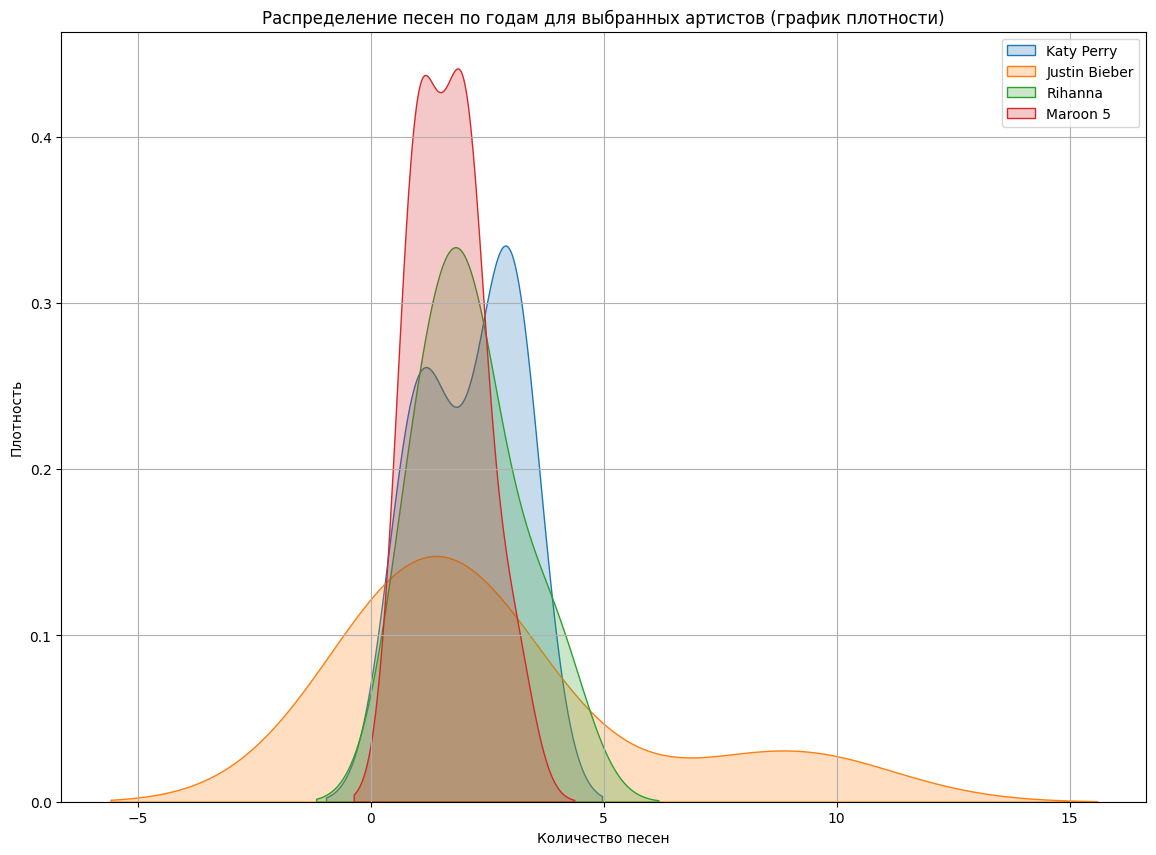

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets

# Группировка данных по годам и артистам
artist_years = data[data['year'] <= 2019].groupby(['year', 'artist']).size().unstack()

# Отфильтровать артистов, чьи имена встречаются в датасете data как минимум 15 раз
valid_artists = data['artist'].value_counts()[data['artist'].value_counts() >= 15].index
artist_years = data[data['year'] <= 2019].groupby(['year', 'artist']).size().unstack().loc[:, valid_artists]

# Создание чекбоксов для выбора артистов
artist_checkboxes = [widgets.Checkbox(description=artist, value=False) for artist in artist_years.columns]

# Создание кнопки подтверждения
confirm_button = widgets.Button(description='Построить график')
confirmation_output = widgets.Output()

# Функция для построения графика на основе выбранных артистов
def plot_selected_artists(button_click):
    selected_artists = [checkbox.description for checkbox in artist_checkboxes if checkbox.value]
    if selected_artists:
        plt.figure(figsize=(14, 10))
        for artist in selected_artists:
            sns.kdeplot(artist_years[artist], label=artist, shade=True)
        plt.title('Распределение песен по годам для выбранных артистов (график плотности)')
        plt.xlabel('Количество песен')
        plt.ylabel('Плотность')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        with confirmation_output:
            print('Выберите хотя бы одного артиста для построения графика.')

confirm_button.on_click(plot_selected_artists)

# Отображаем чекбоксы
user_input = widgets.VBox(artist_checkboxes + [confirm_button, confirmation_output])
display(user_input)

Теперь мы видим, что самый стабильный рекордсмен по попаданию в топ Спотифая - Maroon 5. Самый не стабильный, как мы уже поняли, Джастин Бибер.

Можем отдать последнему дань уважения и прослушать легендарное "бэйби, бэйби, бэйби у..."

In [37]:
import pygame

pygame.init()
pygame.mixer.music.load('Justin Bieber feat. Ludacris - Baby.mp3')
pygame.mixer.music.play()

while pygame.mixer.music.get_busy():
    pygame.time.Clock().tick(10)

Теперь расширим пул артистов, которых можно выбрать: снизим критерий отбора до 10 песен в топе.

Можно посмотреть, какие годы для выбранного артиста были удачными на хиты, а какие не сильно.

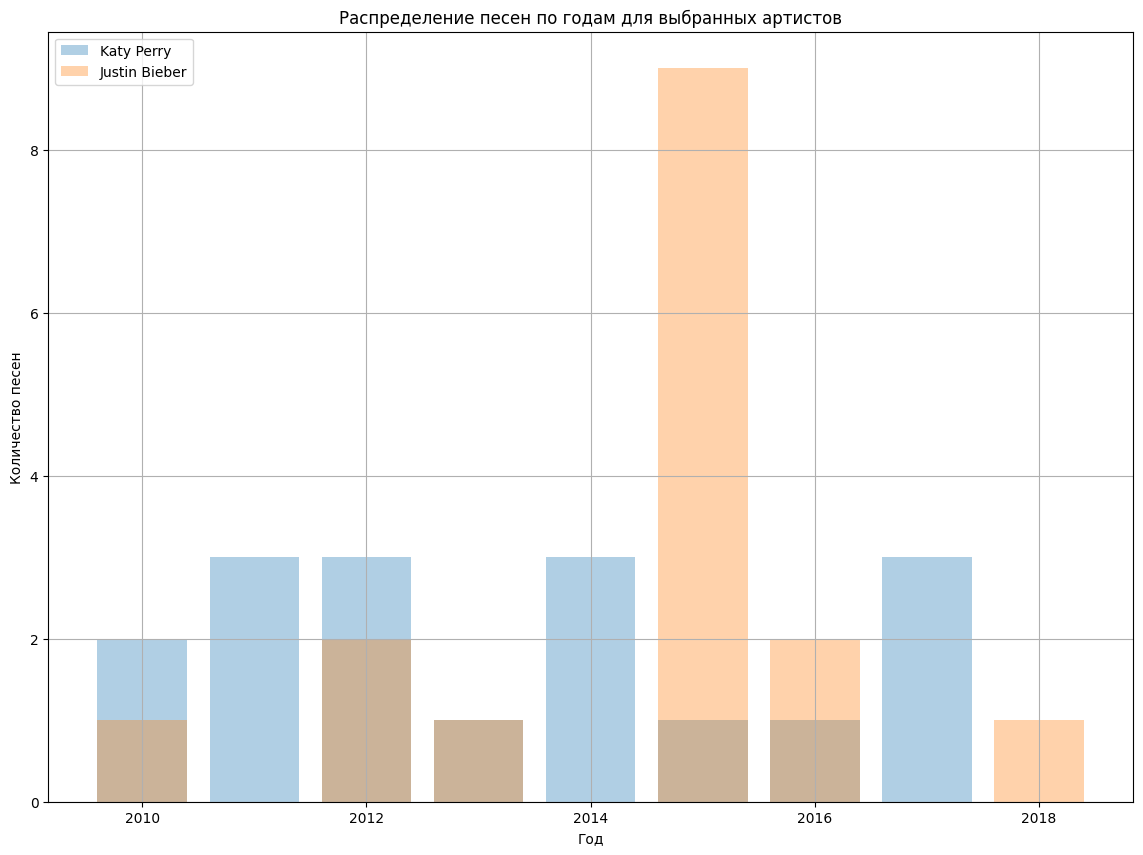

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

# Группировка данных по годам и артистам
artist_years = data[data['year'] <= 2019].groupby(['year', 'artist']).size().unstack()

# Отфильтровать артистов, чьи имена встречаются в датасете data как минимум 10 раз
valid_artists = data['artist'].value_counts()[data['artist'].value_counts() >= 10].index
artist_years = data[data['year'] <= 2019].groupby(['year', 'artist']).size().unstack().loc[:, valid_artists]

# Создание чекбоксов для выбора артистов
artist_checkboxes = [widgets.Checkbox(description=artist, value=False) for artist in artist_years.columns]

# Функция для построения гистограммы на основе выбранных артистов
def plot_selected_artists(button_click):
    selected_artists = [checkbox.description for checkbox in artist_checkboxes if checkbox.value]
    if selected_artists:
        plt.figure(figsize=(14, 10))
        for artist in selected_artists:
            plt.bar(artist_years.index, artist_years[artist], label=artist, alpha=0.35)
        plt.title('Распределение песен по годам для выбранных артистов')
        plt.xlabel('Год')
        plt.ylabel('Количество песен')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        with confirmation_output:
            print('Выберите хотя бы одного артиста для построения графика.')

confirm_button = widgets.Button(description='Построить график')
confirm_button.on_click(plot_selected_artists)
confirmation_output = widgets.Output()

# Отображаем чекбоксы
display(widgets.VBox([*artist_checkboxes, confirm_button, confirmation_output]))

А что если мы хотим найти самый-самый трек за все года?

Переведем нашу базу в SQL формат для быстрой сортировки.

In [32]:
import sqlite3

# Создаем подключение к базе данных
conn = sqlite3.connect('top10s.db')

# Записываем датафрейм в базу данных
data.to_sql('top10s', conn, if_exists='replace', index=False)

# Закрываем подключение
conn.close()

C:\Users\Lena\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [33]:
%load_ext sql

%sql sqlite:///top10s.db

Отлично!

Теперь выведем топ-5 треков по длине.

In [34]:
%%sql

SELECT title, artist, dur
FROM top10s
ORDER BY dur DESC
LIMIT 5;

 * sqlite:///top10s.db
Done.


title,artist,dur
TKO,Justin Timberlake,424
Wish That You Were Here - From Miss Peregrines Home for Peculiar Children Original Motion Picture,Florence + The Machine,403
Monster,Kanye West,379
Lose Yourself to Dance,Daft Punk,354
Take Back the Night,Justin Timberlake,353


А теперь топ-10 по популярности за все года.

In [35]:
%%sql

SELECT title, artist, pop
FROM top10s
ORDER BY pop DESC
LIMIT 10;

 * sqlite:///top10s.db
Done.


title,artist,pop
Memories,Maroon 5,99
Lose You To Love Me,Selena Gomez,97
Someone You Loved,Lewis Capaldi,96
Señorita,Shawn Mendes,95
How Do You Sleep?,Sam Smith,93
South of the Border (feat. Camila Cabello & Cardi B),Ed Sheeran,92
Trampoline (with ZAYN),SHAED,92
Happier,Marshmello,90
Truth Hurts,Lizzo,90
Good as Hell (feat. Ariana Grande) - Remix,Lizzo,90


Спасибо, что посмотрели мой проект! 🐝